<h3>Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, f1_score, recall_score
from tabulate import tabulate


<h3>Extracting Data

In [2]:
data=pd.read_csv("data.csv")

In [3]:
X = data.drop(['result', 'Unnamed: 0'], axis=1)  # Assuming 'result' is the target variable
y = data['result']

#Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3> Standardize features

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>KNN Classification


In [31]:
# Set up KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values for tuning
max_k=int(len(X_train_scaled)**0.5)
knn_param_grid = {
    'n_neighbors': list(range(1, max_k + 1, 2)),  # Starting from 1, up to max_k, with a step of 2
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform Grid Search with 5-fold cross-validation
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5, scoring='f1')
knn_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
knn_best_params = knn_grid_search.best_params_
print("Best Hyperparameters:", knn_best_params)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [32]:
# Train the KNN model with the best hyperparameters on the entire training set
best_knn_classifier = knn_grid_search.best_estimator_
best_knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
knn_test_pred = best_knn_classifier.predict(X_test_scaled)

#Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_test_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_test_pred)
knn_classification_rep = classification_report(y_test, knn_test_pred)

knn_precision = precision_score(y_test, knn_test_pred)
knn_recall = recall_score(y_test, knn_test_pred)
knn_f1 = f1_score(y_test, knn_test_pred)

print("KNN Test Accuracy:", knn_accuracy)
print("KNN Test Confusion Matrix:\n", knn_conf_matrix)
print("KNN Test Classification Report:\n", knn_classification_rep)

KNN Test Accuracy: 0.9963636363636363
KNN Test Confusion Matrix:
 [[147   1]
 [  0 127]]
KNN Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       148
           1       0.99      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



KNN AUC: 0.8320270270270271


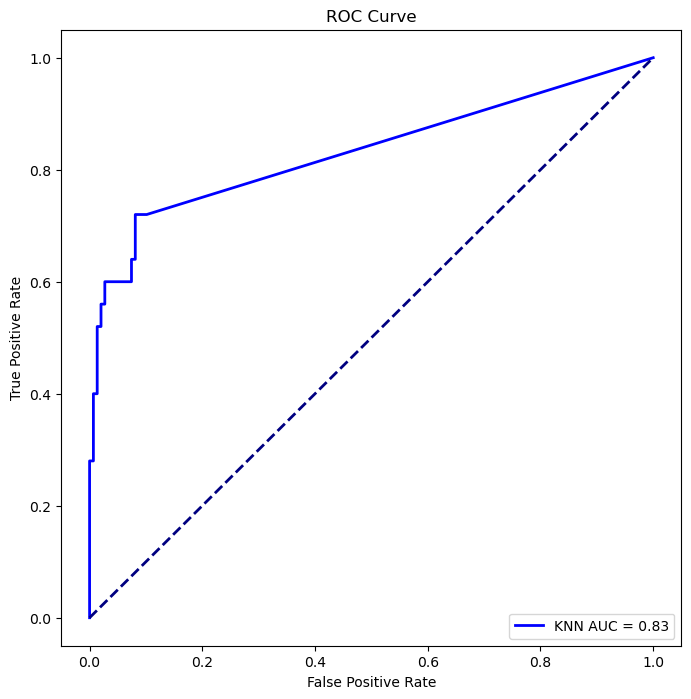

In [7]:
# Predict probabilities for the positive class on the test set
knn_probs = best_knn_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC
knn_auc = roc_auc_score(y_test, knn_probs)
print(f"KNN AUC: {knn_auc}")

# Generate ROC curve
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label=f'KNN AUC = {knn_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h3>Logistic Regression Classification

In [8]:
# Set up Logistic Regression classifier
logistic_regression = LogisticRegression()

# Define the hyperparameters and their possible values for tuning
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Regularization type
}

# Perform Grid Search with 5-fold cross-validation
logreg_grid_search = GridSearchCV(logistic_regression, logreg_param_grid, cv=5, scoring='f1')
logreg_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
logreg_best_params = logreg_grid_search.best_params_
print("Best Hyperparameters:", logreg_best_params)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


In [9]:
# Train the logistic regression model with the best hyperparameters on the entire training set
best_logistic_regression = logreg_grid_search.best_estimator_
best_logistic_regression.fit(X_train_scaled, y_train)

# Predict on the test set
logreg_test_pred = best_logistic_regression.predict(X_test_scaled)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_test_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_test_pred)
logreg_classification_rep = classification_report(y_test, logreg_test_pred)

logreg_precision = precision_score(y_test, logreg_test_pred)
logreg_recall = recall_score(y_test, logreg_test_pred)
logreg_f1 = f1_score(y_test, logreg_test_pred)

print("Logistic Regression Test Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)
print("Logistic Regression Classification Report:\n", logreg_classification_rep)

Logistic Regression Test Accuracy: 0.9364161849710982
Logistic Regression Confusion Matrix:
 [[146   2]
 [  9  16]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       148
           1       0.89      0.64      0.74        25

    accuracy                           0.94       173
   macro avg       0.92      0.81      0.85       173
weighted avg       0.93      0.94      0.93       173



Logistic Regression AUC: 0.922972972972973


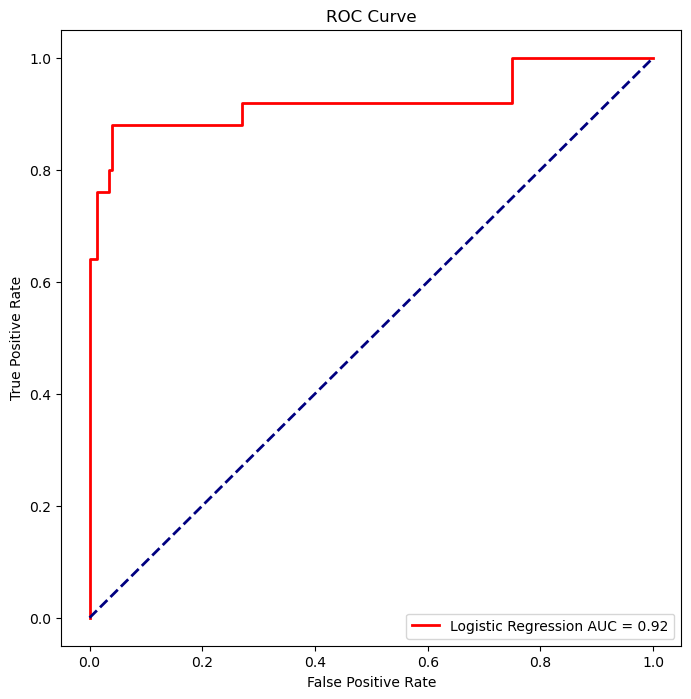

In [10]:
# Predict probabilities for the positive class on the test set
logreg_probs = best_logistic_regression.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC
logreg_auc = roc_auc_score(y_test, logreg_probs)
print(f"Logistic Regression AUC: {logreg_auc}")

# Generate ROC curve
logreg_fpr, logreg_tpr, thresholds = roc_curve(y_test, logreg_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(logreg_fpr, logreg_tpr, color='red', lw=2, label=f'Logistic Regression AUC = {logreg_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h3>Naive Bayes Classification

In [11]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Define the hyperparameters and their possible values for tuning
naive_bayes_param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1]}

# Perform Grid Search with 5-fold cross-validation
naive_bayes_grid_search = GridSearchCV(naive_bayes_classifier, naive_bayes_param_grid, cv=5, scoring='f1')
naive_bayes_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
naive_bayes_best_params = naive_bayes_grid_search.best_params_
print("Best Hyperparameters:", naive_bayes_best_params)

Best Hyperparameters: {'var_smoothing': 0.1}


In [12]:
# Train the Naive Bayes model with the best hyperparameters on the entire training set
best_naive_bayes_classifier = naive_bayes_grid_search.best_estimator_
best_naive_bayes_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
naive_bayes_test_pred = best_naive_bayes_classifier.predict(X_test_scaled)

# Evaluate the model
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_test_pred)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_test_pred)
naive_bayes_classification_rep = classification_report(y_test, naive_bayes_test_pred)

naive_bayes_precision = precision_score(y_test, naive_bayes_test_pred)
naive_bayes_recall = recall_score(y_test, naive_bayes_test_pred)
naive_bayes_f1 = f1_score(y_test, naive_bayes_test_pred)

print("Naive Bayes Test Accuracy:", naive_bayes_accuracy)
print("Naive Bayes Test Confusion Matrix:\n", naive_bayes_conf_matrix)
print("Naive Bayes Test Classification Report:\n", naive_bayes_classification_rep)

Naive Bayes Test Accuracy: 0.815028901734104
Naive Bayes Test Confusion Matrix:
 [[121  27]
 [  5  20]]
Naive Bayes Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       148
           1       0.43      0.80      0.56        25

    accuracy                           0.82       173
   macro avg       0.69      0.81      0.72       173
weighted avg       0.88      0.82      0.84       173



Naive Bayes AUC: 0.8675675675675676


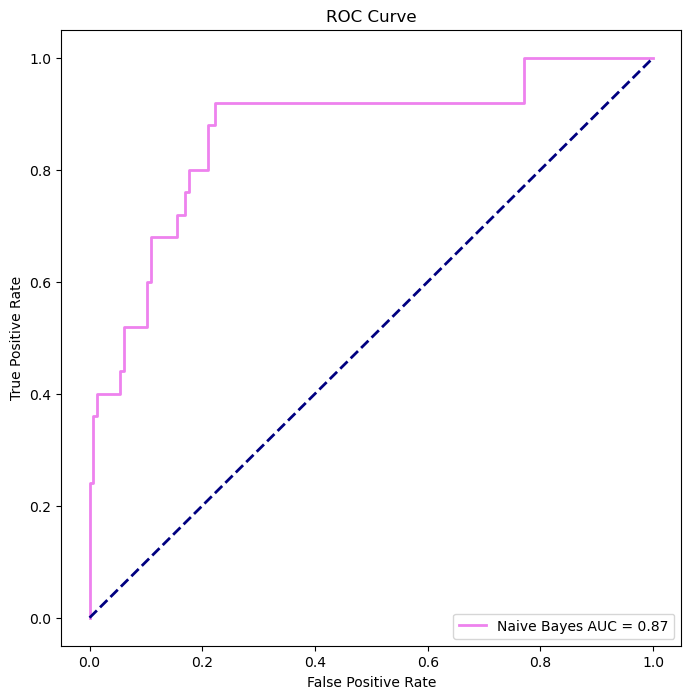

In [13]:
naive_bayes_probs = best_naive_bayes_classifier.predict_proba(X_test_scaled)[:, 1]
naive_bayes_auc = roc_auc_score(y_test, naive_bayes_probs)
print("Naive Bayes AUC:", naive_bayes_auc)

# Generate ROC curve
naive_bayes_fpr, naive_bayes_tpr, thresholds = roc_curve(y_test, naive_bayes_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(naive_bayes_fpr, naive_bayes_tpr, color='violet', lw=2, label=f'Naive Bayes AUC = {naive_bayes_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h3>Decision Tree Classification

In [14]:
# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Define the hyperparameters and their possible values
tree_param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with 5-fold cross-validation
tree_grid_search = GridSearchCV(decision_tree_classifier, tree_param_grid, cv=5, scoring='f1')
tree_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
tree_best_params = tree_grid_search.best_params_
print("Best Decision Tree Hyperparameters:", tree_best_params)

Best Decision Tree Hyperparameters: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
# Train the Decision Tree model with the best hyperparameters on the entire training set
best_decision_tree = tree_grid_search.best_estimator_
best_decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
tree_test_pred = best_decision_tree.predict(X_test_scaled)

# Evaluate the Decision Tree model
tree_accuracy = accuracy_score(y_test, tree_test_pred)
tree_conf_matrix = confusion_matrix(y_test, tree_test_pred)
tree_classification_rep = classification_report(y_test, tree_test_pred)

tree_precision = precision_score(y_test, tree_test_pred)
tree_recall = recall_score(y_test, tree_test_pred)
tree_f1 = f1_score(y_test, tree_test_pred)

print("Decision Tree Test Accuracy:", tree_accuracy)
print("Decision Tree Confusion Matrix:\n", tree_conf_matrix)
print("Decision Tree Classification Report:\n", tree_classification_rep)

Decision Tree Test Accuracy: 0.9479768786127167
Decision Tree Confusion Matrix:
 [[143   5]
 [  4  21]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.81      0.84      0.82        25

    accuracy                           0.95       173
   macro avg       0.89      0.90      0.90       173
weighted avg       0.95      0.95      0.95       173



Decision Tree AUC: 0.903108108108108


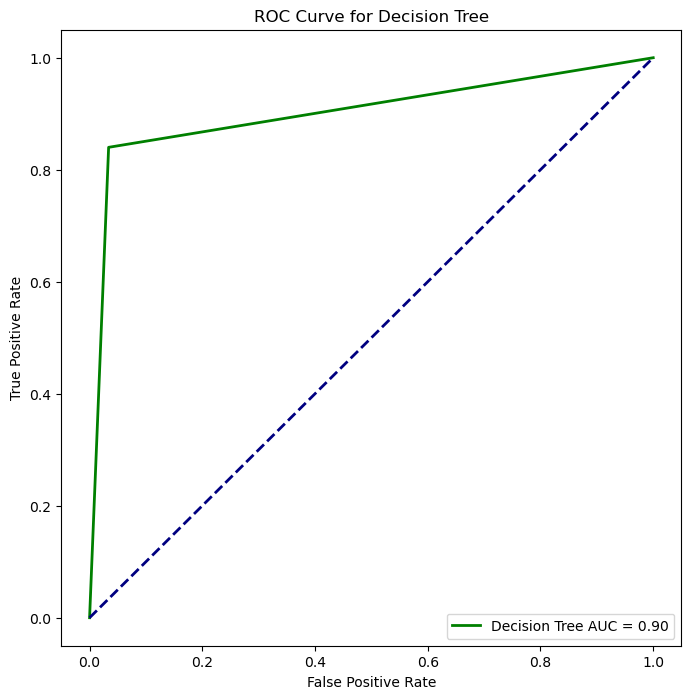

In [16]:
# Predict probabilities for the positive class on the test set
tree_probs = best_decision_tree.predict_proba(X_test_scaled)[:, 1]
# Calculate AUC
tree_auc = roc_auc_score(y_test, tree_probs)
print(f"Decision Tree AUC: {tree_auc}")

# Generate ROC curve for Decision Tree
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree_probs)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 8))
plt.plot(tree_fpr, tree_tpr, color='green', lw=2, label=f'Decision Tree AUC = {tree_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

<h3>Support Vector Machines Classification

In [17]:
# Create an SVM classifier
svm_classifier = SVC(probability=True)  # probability=True for ROC-AUC calculation

# Define the hyperparameters and their possible values for tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4],  # Degree for polynomial kernel
}

# Perform Grid Search with 5-fold cross-validation
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5, scoring='f1')
svm_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
svm_best_params = svm_grid_search.best_params_
print("Best Hyperparameters:", svm_best_params)

Best Hyperparameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}


In [18]:
# Train the SVM model with the best hyperparameters on the entire training set
best_svm_classifier = svm_grid_search.best_estimator_
best_svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
svm_test_pred = best_svm_classifier.predict(X_test_scaled)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_test_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_test_pred)
svm_classification_rep = classification_report(y_test, svm_test_pred)

svm_precision = precision_score(y_test, svm_test_pred)
svm_recall = recall_score(y_test, svm_test_pred)
svm_f1 = f1_score(y_test, svm_test_pred)

print("SVM Test Accuracy:", svm_accuracy)
print("SVM Test Confusion Matrix:\n", svm_conf_matrix)
print("SVM Test Classification Report:\n", svm_classification_rep)

SVM Test Accuracy: 0.9248554913294798
SVM Test Confusion Matrix:
 [[145   3]
 [ 10  15]]
SVM Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       148
           1       0.83      0.60      0.70        25

    accuracy                           0.92       173
   macro avg       0.88      0.79      0.83       173
weighted avg       0.92      0.92      0.92       173



SVM AUC: 0.9605405405405405


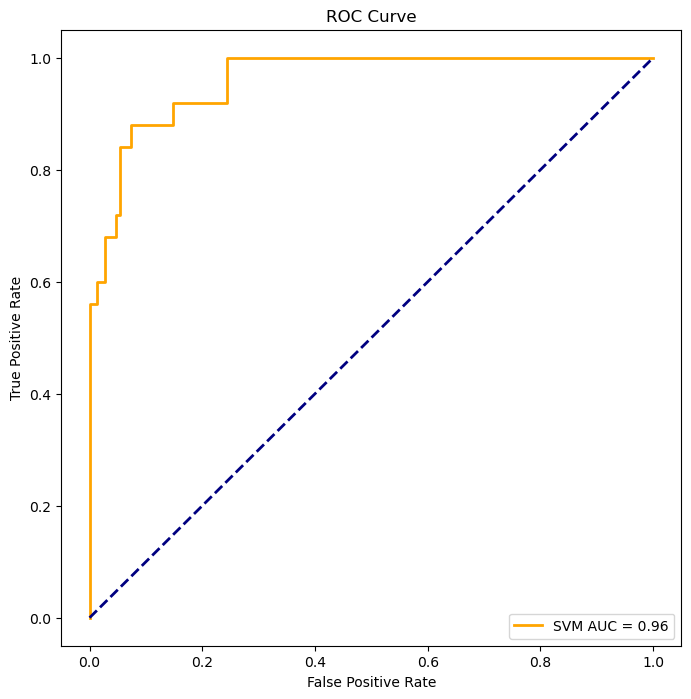

In [19]:
# Predict probabilities for the positive class on the test set
svm_probs = best_svm_classifier.predict_proba(X_test_scaled)[:, 1]
# Calculate AUC
svm_auc = roc_auc_score(y_test, svm_probs)
print("SVM AUC:", svm_auc)

# Generate ROC curve
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(svm_fpr, svm_tpr, color='orange', lw=2, label=f'SVM AUC = {svm_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h4>Comparison Between Models</h4>

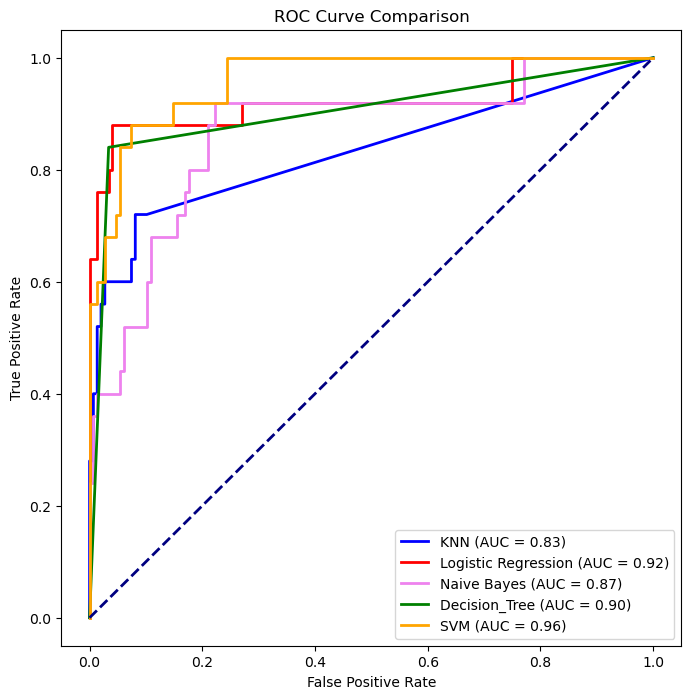

In [20]:
# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, color='red', lw=2, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(naive_bayes_fpr, naive_bayes_tpr, color='violet', lw=2, label=f'Naive Bayes (AUC = {naive_bayes_auc:.2f})')
plt.plot(tree_fpr, tree_tpr, color='green', lw=2, label=f'Decision_Tree (AUC = {tree_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='orange', lw=2, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Sample data (replace with actual data)
classifiers = ['K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes','Decision Tree','SVM']

# Metrics calculation
best_params = [knn_best_params, logreg_best_params, naive_bayes_best_params,tree_best_params,svm_best_params]
precision = [knn_precision, logreg_precision, naive_bayes_precision,tree_precision,svm_precision]
recall = [knn_recall, logreg_recall, naive_bayes_recall,tree_recall,svm_recall]
f1 = [knn_f1, logreg_f1, naive_bayes_f1,tree_f1,svm_f1]
roc_auc = [knn_auc, logreg_auc, naive_bayes_auc,tree_auc,svm_auc]

# Create the table
table_data = zip(classifiers, best_params, precision, recall, f1, roc_auc)
headers = ['Classifier', 'Best Hyperparameters', 'Precision', 'Recall', 'F1-Score', 'ROC/AUC']
table = tabulate(table_data, headers=headers, tablefmt='github')

# Display the table
print(table)


| Classifier          | Best Hyperparameters                                                                  |   Precision |   Recall |   F1-Score |   ROC/AUC |
|---------------------|---------------------------------------------------------------------------------------|-------------|----------|------------|-----------|
| K-Nearest Neighbors | {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}                                     |    0.866667 |     0.52 |   0.65     |  0.832027 |
| Logistic Regression | {'C': 1, 'penalty': 'l2'}                                                             |    0.888889 |     0.64 |   0.744186 |  0.922973 |
| Naive Bayes         | {'var_smoothing': 0.1}                                                                |    0.425532 |     0.8  |   0.555556 |  0.867568 |
| Decision Tree       | {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2} |    0.807692 |     0.84 |   0.823529 |  0.903108 |
| SVM                 | {'C'

<h5>When choosing the hyperparameters and doing cross validation we choose the scoring method to be F1-score to decrease the average false positive and false negative rate of the model so according to the outcome it appears that Decision Tree has the best F1-score of the 5 models so it's better to use Decision Tree model on this data</h5>